In [38]:
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt


# Download data:

In [39]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
zip_file_path = "/content/drive/My Drive/Colab/cats_and_dogs_data.zip"

In [41]:
data_files = np.load(zip_file_path)

In [42]:
np.load(zip_file_path)

In [43]:
X_train = data_files['content/data/X_train']
Y_train = data_files['content/data/Y_train']
X_test = data_files['content/data/X_test']
Y_test = data_files['content/data/Y_test']
del data_files

# Preprocessing: 

In [44]:
datasets = {'X_train':X_train, 'Y_train': Y_train, 'X_test': X_test, 'Y_test': Y_test}

In [45]:
for array in datasets:
  if array == 'X_train' or array == 'X_test':
    datasets[array]/= 255.0
  print(f'Shape of {array} is:', datasets[array].shape)
del datasets

Shape of X_train is: (3200, 180, 180, 3)
Shape of Y_train is: (3200,)
Shape of X_test is: (800, 180, 180, 3)
Shape of Y_test is: (800,)


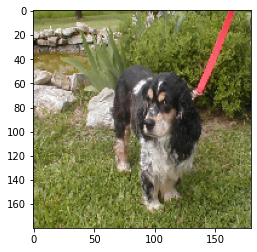

In [46]:
plt.imshow(X_train[654])

## Plot Random photos with labels:

<Figure size 432x288 with 0 Axes>

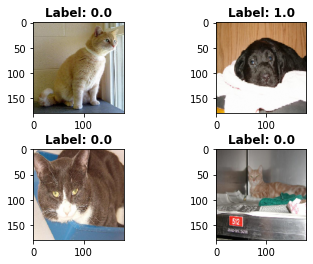

In [47]:
def plot_random_samples(x, y):
  plt.figure()

  f, axarr = plt.subplots(2, 2, gridspec_kw={'hspace':0.4}) 
  rands = np.random.randint(x.shape[0], size=4)
  axarr[0, 0].imshow(x[rands[0], :, :])
  axarr[0, 0].set_title('Label: ' + str(y[rands[0]]), fontweight='bold')

  axarr[1, 0].imshow(x[rands[1], :, :])
  axarr[1, 0].set_title('Label: ' + str(y[rands[1]]), fontweight='bold')

  axarr[0, 1].imshow(x[rands[2], :, :])
  axarr[0, 1].set_title('Label: ' + str(y[rands[2]]), fontweight='bold')

  axarr[1, 1].imshow(x[rands[3], :, :])
  axarr[1, 1].set_title('Label: ' + str(y[rands[3]]), fontweight='bold')

  plt.show()

plot_random_samples(X_train, Y_train)

## Train and Validation split:

In [48]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=1/6)

### Deleting train to free RAM:

In [49]:
del(X_train)
del(Y_train)

# Part 1- Building a Neural Network:

In [50]:
from keras.models import Sequential 
from keras.layers import Dense, Flatten, Conv2D, Input, MaxPooling2D, Dropout, GlobalAveragePooling2D, BatchNormalization 
from keras.losses import SparseCategoricalCrossentropy, BinaryCrossentropy
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.applications import Xception
from keras import Input
from keras.metrics import BinaryAccuracy
from keras import Model


In [51]:
results = {}

In [52]:
SimpleModel = Sequential()
results['simple'] = {}

In [53]:
SimpleModel.add(Input(shape=(180, 180, 3)))
SimpleModel.add(Conv2D(32, kernel_size=(3, 3), activation="relu"))
SimpleModel.add(MaxPooling2D(pool_size=(2, 2)))
SimpleModel.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
SimpleModel.add(MaxPooling2D(pool_size=(2, 2)))
SimpleModel.add(Conv2D(128, kernel_size=(3, 3), activation="relu"))
SimpleModel.add(MaxPooling2D(pool_size=(2, 2)))
SimpleModel.add(Conv2D(256, kernel_size=(3, 3), activation="relu"))
SimpleModel.add(Flatten())
SimpleModel.add(Dense(32, activation="relu"))
SimpleModel.add(Dense(2, activation="softmax"))
SimpleModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_5 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 41, 41, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 20, 20, 128)      0

In [54]:
SimpleModel.compile(optimizer='adam', 
             loss=SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

#SimpleModel.compile(optimizer=Adam(decay=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


#### Sometimes below model not working!!

In [55]:
history = SimpleModel.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=13)

Epoch 1/13
84/84 [==============================] - 5s 49ms/step - loss: 0.7026 - accuracy: 0.5158 - val_loss: 0.6937 - val_accuracy: 0.5056
Epoch 2/13
84/84 [==============================] - 4s 42ms/step - loss: 0.6724 - accuracy: 0.5698 - val_loss: 0.7087 - val_accuracy: 0.5318
Epoch 3/13
84/84 [==============================] - 4s 42ms/step - loss: 0.6599 - accuracy: 0.5851 - val_loss: 0.6498 - val_accuracy: 0.6049
Epoch 4/13
84/84 [==============================] - 4s 42ms/step - loss: 0.6279 - accuracy: 0.6328 - val_loss: 0.6532 - val_accuracy: 0.6030
Epoch 5/13
84/84 [==============================] - 4s 43ms/step - loss: 0.6099 - accuracy: 0.6482 - val_loss: 0.6314 - val_accuracy: 0.6236
Epoch 6/13
84/84 [==============================] - 4s 42ms/step - loss: 0.6139 - accuracy: 0.6583 - val_loss: 0.6295 - val_accuracy: 0.6498
Epoch 7/13
84/84 [==============================] - 4s 42ms/step - loss: 0.5565 - accuracy: 0.7082 - val_loss: 0.6009 - val_accuracy: 0.7041
Epoch 8/13
84

In [56]:
def plot_history(model, history, x_train, y_train, x_val, y_val): 
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.5, 1])
    plt.legend(loc='lower right')
    plt.show()
    _, train_acc = model.evaluate(x_train, y_train, verbose=0)
    _, val_acc = model.evaluate(x_val, y_val, verbose=0)
    print('Train: %.3f, validation: %.3f' % (train_acc, val_acc))
    # plot loss during training
    plt.subplot(211)
    plt.title('Loss')
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='val')
    plt.legend()
    # plot accuracy during training
    plt.subplot(212)
    plt.title('Accuracy')
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='val')
    plt.legend()
    plt.show()

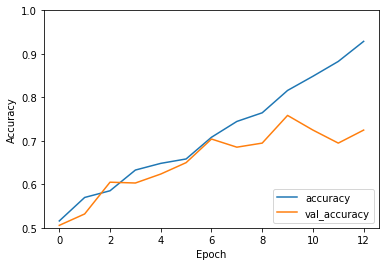

Train: 0.968, validation: 0.725


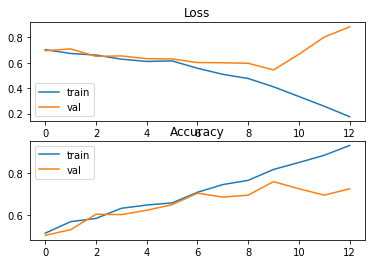

In [57]:
plot_history(SimpleModel, history, x_train, y_train, x_val, y_val)

In [58]:
simple_eval = SimpleModel.evaluate(X_test, Y_test)


25/25 [==============================] - 1s 20ms/step - loss: 0.7840 - accuracy: 0.7513


In [59]:
results['simple']['params'] = '3,042,722'
results['simple']['layers'] = '6'
results['simple']['regulars'] = ('max pooling')
results['simple']['epochs'] = 13
results['simple']['loss'] = 'SparseCategoricalCrossentropy'
results['simple']['opt'] = 'adam'
results['simple']['train'] = history.history['accuracy'][-1]
results['simple']['test'] = simple_eval[1]

### Deleting model to free memory:

In [60]:
from keras.backend import clear_session
del SimpleModel
clear_session()

# Part 2:

## Building and fitting the network:

In [61]:
# define the model
OriginalModel = Sequential()

# add a convolutional layer with 32 filters and a kernel size of 3x3
OriginalModel.add(Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)))

# add a batch normalization layer
OriginalModel.add(BatchNormalization())

# add a max pooling layer with a pool size of 2x2
OriginalModel.add(MaxPooling2D((2, 2)))

# add another convolutional layer with 64 filters and a kernel size of 3x3
OriginalModel.add(Conv2D(64, (3, 3), activation='relu'))

# add another batch normalization layer
OriginalModel.add(BatchNormalization())

# add another max pooling layer with a pool size of 2x2
OriginalModel.add(MaxPooling2D((2, 2)))

# add another convolutional layer with 128 filters and a kernel size of 3x3
OriginalModel.add(Conv2D(128, (3, 3), activation='relu'))


# add another batch normalization layer
OriginalModel.add(BatchNormalization())


# add another max pooling layer with a pool size of 2x2
OriginalModel.add(MaxPooling2D((2, 2)))

# add another convolutional layer with 256 filters and a kernel size of 3x3
OriginalModel.add(Conv2D(256, (3, 3), activation='relu'))

# add another batch normalization layer
OriginalModel.add(BatchNormalization())

# add another max pooling layer with a pool size of 2x2
OriginalModel.add(MaxPooling2D((2, 2)))

OriginalModel.add(Conv2D(512, (3, 3), activation='relu'))
OriginalModel.add(BatchNormalization())
OriginalModel.add(MaxPooling2D((2, 2)))


# add a flattening layer
OriginalModel.add(Flatten())

# add a dense layer with 128 units and a relu activation function
OriginalModel.add(Dense(128, activation='relu'))

# add another batch normalization layer
OriginalModel.add(BatchNormalization())

# add a dropout layer with a rate of 0.5
OriginalModel.add(Dropout(0.5))

# add a dense layer with 2 units and a softmax activation function
OriginalModel.add(Dense(2, activation='softmax'))

# compile the OriginalModel using an Adam optimizer with a weight decay of 0.001
OriginalModel.compile(optimizer=Adam(decay=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# set up early stopping to monitor the validation loss and stop the training process when it begins to decline
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

OriginalModel.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 178, 178, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 87, 87, 64)       256       
 hNormalization)                                                 
                                                        

In [62]:
history = OriginalModel.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=17, batch_size = 32)#, callbacks=[early_stopping])

Epoch 1/17
84/84 [==============================] - 6s 62ms/step - loss: 1.0716 - accuracy: 0.5750 - val_loss: 2.4428 - val_accuracy: 0.5300
Epoch 2/17
84/84 [==============================] - 5s 59ms/step - loss: 0.7705 - accuracy: 0.6508 - val_loss: 2.6131 - val_accuracy: 0.5300
Epoch 3/17
84/84 [==============================] - 5s 58ms/step - loss: 0.6596 - accuracy: 0.6868 - val_loss: 1.7793 - val_accuracy: 0.5300
Epoch 4/17
84/84 [==============================] - 5s 57ms/step - loss: 0.5503 - accuracy: 0.7359 - val_loss: 1.5963 - val_accuracy: 0.5300
Epoch 5/17
84/84 [==============================] - 5s 57ms/step - loss: 0.5139 - accuracy: 0.7566 - val_loss: 1.8458 - val_accuracy: 0.5393
Epoch 6/17
84/84 [==============================] - 5s 57ms/step - loss: 0.4271 - accuracy: 0.8050 - val_loss: 0.6605 - val_accuracy: 0.6835
Epoch 7/17
84/84 [==============================] - 5s 57ms/step - loss: 0.3584 - accuracy: 0.8481 - val_loss: 0.5841 - val_accuracy: 0.7322
Epoch 8/17
84

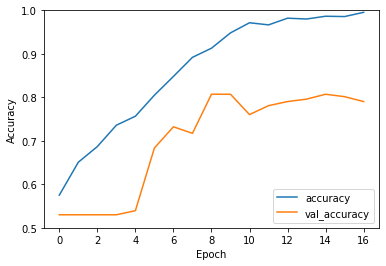

Train: 1.000, validation: 0.790


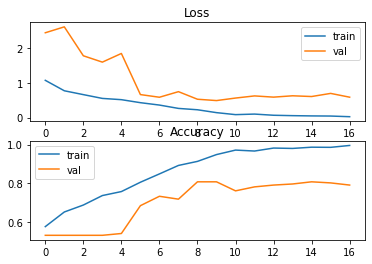

In [63]:
plot_history(OriginalModel, history, x_train, y_train, x_val, y_val)

In [64]:
original_eval = OriginalModel.evaluate(X_test, Y_test)

25/25 [==============================] - 0s 16ms/step - loss: 0.5575 - accuracy: 0.8138


In [65]:
results['original'] = {}
results['original']['params'] = '2,163,266'
results['original']['layers'] = '7'
results['original']['regulars'] = ('max_pooling', 'batch_normalization', 'dropout')
results['original']['epochs'] = 17
results['original']['loss'] = 'SparseCategoricalCrossentropy'
results['original']['opt'] = 'adam'
results['original']['train'] = history.history['accuracy'][-1]
results['original']['test'] = original_eval[1]

### Deleting model to free memory:

In [66]:
from keras.backend import clear_session
clear_session()

# Part 3- Transfer Learning:

In [67]:
base_model = Xception(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(180, 180, 3),
    include_top=False)
base_model.trainable = False
inputs = Input(shape=(180, 180, 3))

x = base_model(inputs, training=False)
# Convert features of shape `base_model.output_shape[1:]` to vectors
x = GlobalAveragePooling2D()(x)
# A Dense classifier with a single unit (binary classification)
outputs = Dense(1)(x)
imagenet_model = Model(inputs, outputs)
imagenet_model.compile(optimizer=Adam(1e-5),
              loss=BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

imagenet_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 xception (Functional)       (None, 6, 6, 2048)        20861480  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1)                 2049      
                                                                 
Total params: 20,863,529
Trainable params: 2,049
Non-trainable params: 20,861,480
_________________________________________________________________


In [68]:
i_history = imagenet_model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20, batch_size = 32)

Epoch 1/20
84/84 [==============================] - 13s 116ms/step - loss: 0.7189 - accuracy: 0.5049 - val_loss: 0.6946 - val_accuracy: 0.5337
Epoch 2/20
84/84 [==============================] - 9s 106ms/step - loss: 0.6687 - accuracy: 0.5409 - val_loss: 0.6492 - val_accuracy: 0.5749
Epoch 3/20
84/84 [==============================] - 9s 108ms/step - loss: 0.6245 - accuracy: 0.5769 - val_loss: 0.6078 - val_accuracy: 0.6161
Epoch 4/20
84/84 [==============================] - 9s 109ms/step - loss: 0.5850 - accuracy: 0.6159 - val_loss: 0.5698 - val_accuracy: 0.6685
Epoch 5/20
84/84 [==============================] - 9s 107ms/step - loss: 0.5491 - accuracy: 0.6553 - val_loss: 0.5353 - val_accuracy: 0.6891
Epoch 6/20
84/84 [==============================] - 10s 119ms/step - loss: 0.5168 - accuracy: 0.6947 - val_loss: 0.5034 - val_accuracy: 0.7154
Epoch 7/20
84/84 [==============================] - 9s 105ms/step - loss: 0.4874 - accuracy: 0.7374 - val_loss: 0.4745 - val_accuracy: 0.7584
Epoc

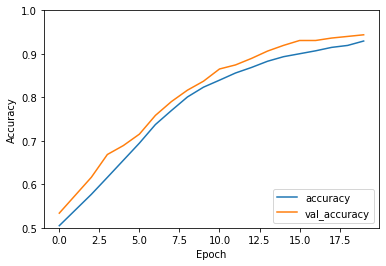

Train: 0.933, validation: 0.944


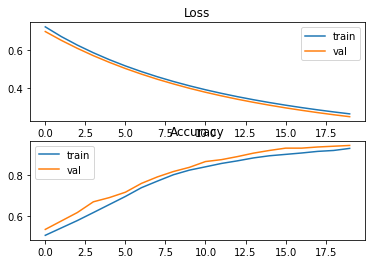

In [69]:
plot_history(imagenet_model, i_history, x_train, y_train, x_val, y_val)

In [70]:
base_model.trainable = True
imagenet_model.compile(optimizer=Adam(1e-5),
             loss=BinaryCrossentropy(from_logits=True),
              metrics=[BinaryAccuracy()])

In [71]:
imagenet_model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=1, batch_size = 32)

84/84 [==============================] - 41s 440ms/step - loss: 0.0996 - binary_accuracy: 0.9715 - val_loss: 0.0389 - val_binary_accuracy: 0.9888


In [72]:
imagenet_model.evaluate(x_val, y_val)

17/17 [==============================] - 2s 88ms/step - loss: 0.0389 - binary_accuracy: 0.9888


[0.03885415196418762, 0.9887640476226807]

In [73]:
imagenet_eval = imagenet_model.evaluate(X_test, Y_test)

25/25 [==============================] - 2s 88ms/step - loss: 0.0581 - binary_accuracy: 0.9837


In [74]:
results['imagenet'] = {}
results['imagenet']['params'] = '20,861,480'
results['imagenet']['layers'] = '3'
results['imagenet']['regulars'] = ('global_average_pooling')
results['imagenet']['epochs'] = 20
results['imagenet']['loss'] = 'BinaryCrossentropy'
results['imagenet']['opt'] = 'adam'
results['imagenet']['train'] = i_history.history['accuracy'][-1]
results['imagenet']['test'] = imagenet_eval[1]

In [75]:

imagenet_model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 xception (Functional)       (None, 6, 6, 2048)        20861480  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1)                 2049      
                                                                 
Total params: 20,863,529
Trainable params: 20,809,001
Non-trainable params: 54,528
_________________________________________________________________


# Results:

In [84]:
import pandas as pd

model_names = ('simple', 'original', 'imagenet') 

submission = {'model': ['Basic CNN', 'My Model', 'imagenet']}


def update_submission(k, v):
  global submission
  new_v = submission.get(k, [])
  new_v.append(v)
  submission[k] = new_v



for model in ('simple', 'original', 'imagenet'):
    result = results[model]
    update_submission('Test score (Accuracy)', result['test'])
    update_submission('Train score (Accuracy)',result['train'])
    update_submission('Number of trainable parameters',result['params'])
    update_submission('Number of layers',result['layers'])
    update_submission('Regularization methods',result['regulars'])
    update_submission('Number of epochs',result['epochs'])
    update_submission('Loss function',result['loss'])
    update_submission('Optimizer',result['opt'])

# results = {'model': ['Basic CNN', 'My Model', 'imagene

df = pd.DataFrame(submission)
df
  

,model,Test score (Accuracy),Train score (Accuracy),Number of trainable parameters,Number of layers,Regularization methods,Number of epochs,Loss function,Optimizer
0,Basic CNN,0.75125,0.928732,"3,042,722",6,max pooling,13,SparseCategoricalCrossentropy,adam
1,My Model,0.81375,0.995499,"2,163,266",7,"(max_pooling, batch_normalization, dropout)",17,SparseCategoricalCrossentropy,adam
2,imagenet,0.98375,0.929482,"20,861,480",3,global_average_pooling,20,BinaryCrossentropy,adam


In [81]:
submission.get('Test score (Accuracy)', [])

In [83]:
submission

{'model': ['Basic CNN', 'My Model', 'imagenet'],
 'Test score (Accuracy)': None,
 'Train score (Accuracy)': None,
 'Number of trainable parameters': None,
 'Number of layers': None,
 'Regularization methods': None,
 'Number of epochs': None,
 'Loss function': None,
 'Optimizer': None}

In [85]:
import os
df.to_csv(os.path.join(os.getcwd(), 'results.csv'))